## Figure S3: Individual behavior

*Last update: 2022-09-09*


In [1]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from pathlib import Path
import importlib

from trial import Trial
from util import dist
from constants import COND_LABELS, FS, COUNTER_LABELS
import plots
import pyreadstat
import analysis_helper

importlib.reload(plots)
importlib.reload(analysis_helper)

plt.style.use('./jg.mplstyle')

### Load data and prepare output directory

In [2]:
df_trials = pd.read_pickle('../data/df_trials_v4.pickle')

### Drop dyads with incomplete trial counts

In [3]:
DROP_IDS = []
for p0 in df_trials.p0.unique():
    n = len(df_trials[df_trials.p0 == p0])
    if n < 82:
        print("%s incomplete, %d trials" % (p0, n))
        
for mid in DROP_IDS:
    df_trials = df_trials.drop(df_trials[df_trials.match_id == mid].index)

# Drop practice
df_trials = df_trials[df_trials.practice == 0]        

KvUtiE8YJZbFWmE2qCW8ASYWYJk1 incomplete, 81 trials


2cc26a[GC]


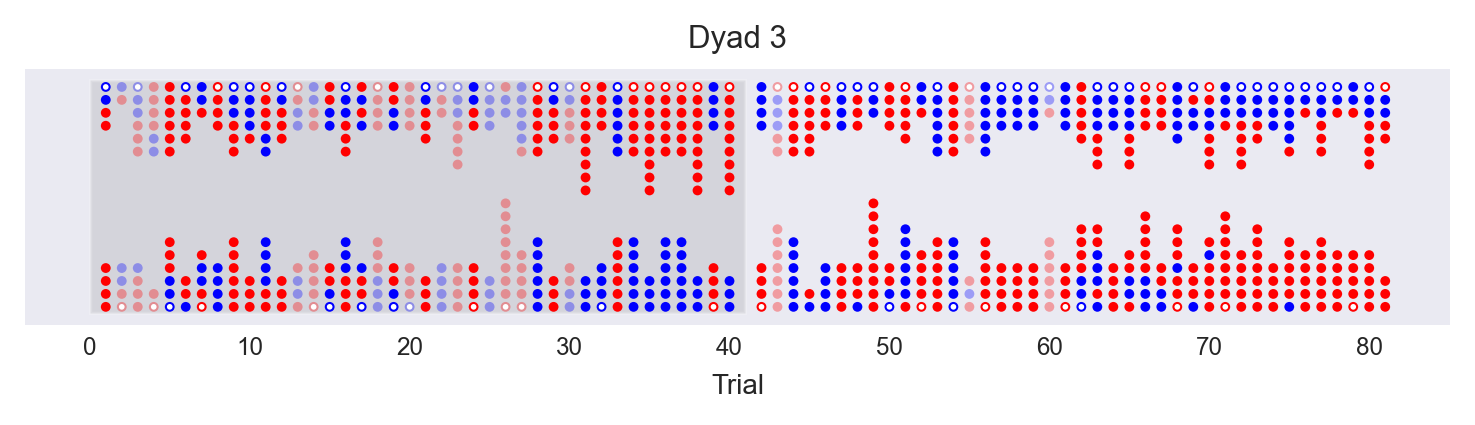

5g0h27[CG]


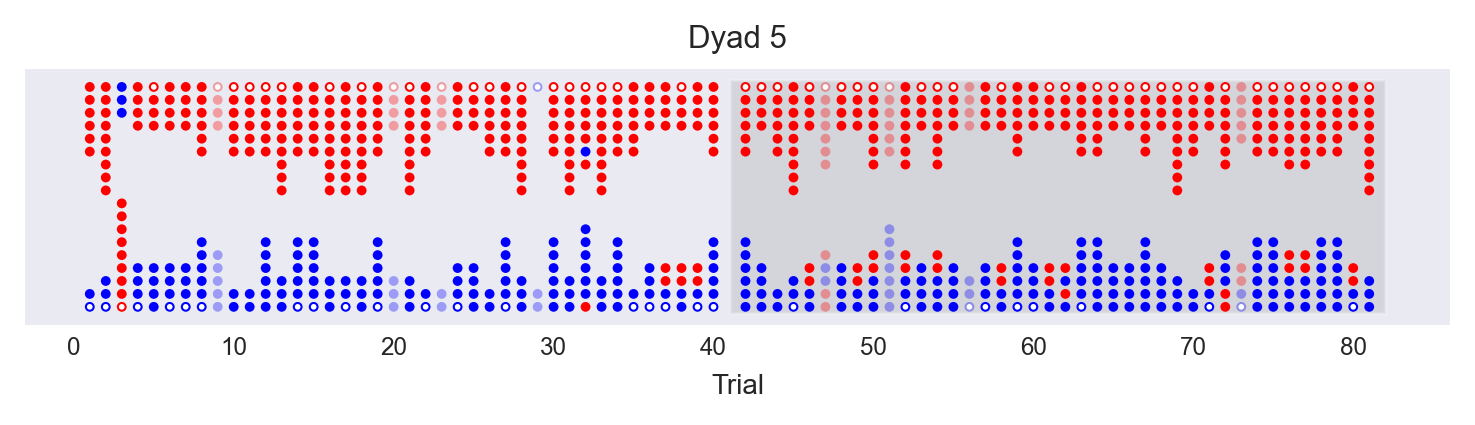

17g7hb[CG]


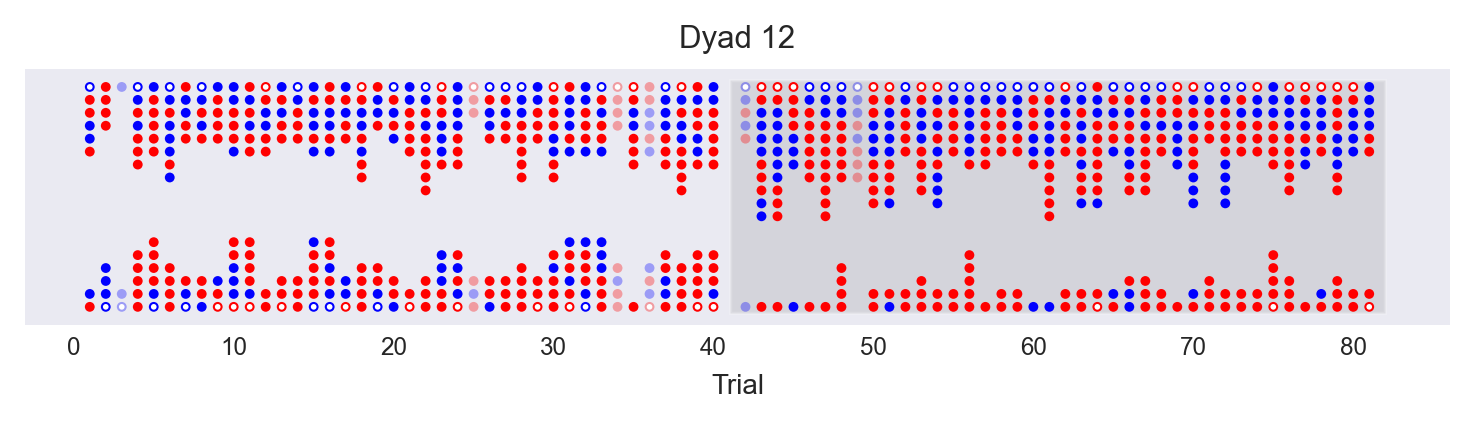

fzr7ro[GC]


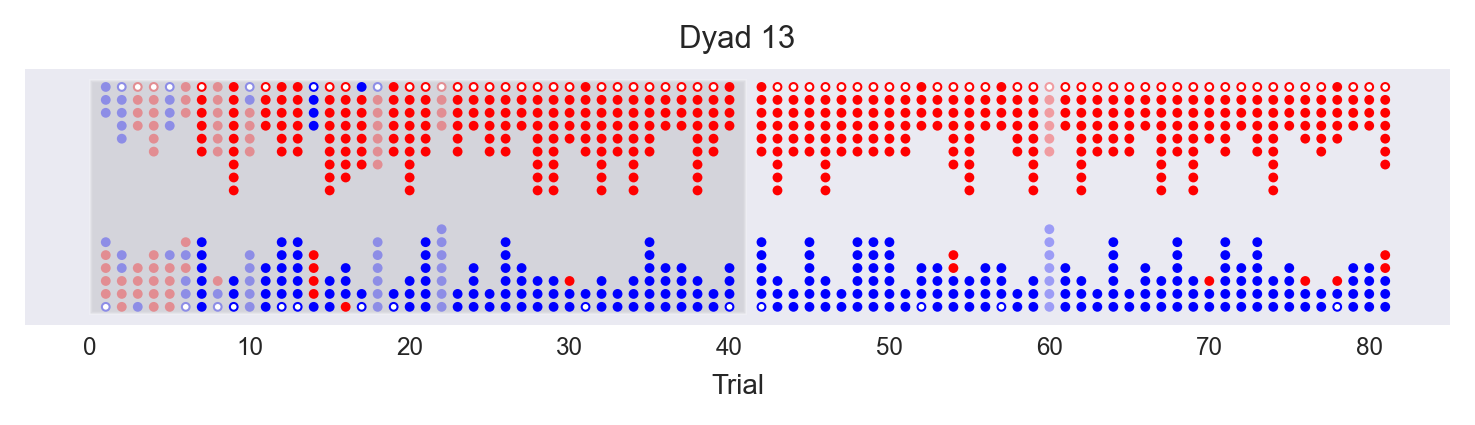

In [4]:
def match_gem_stack_timeseries(match_nick, split_row_attr=None, split_row_values=None, title=None, marker_size=8.):
    df_match = analysis_helper.match_trials(df_trials, match_nick=match_nick)
    match_id = df_match.iloc[0]['match_id']
    match_nick = df_match.iloc[0]['match_nick']
    trials = Trial.All(match_id)
    fig, ax = plt.subplots(dpi=250, figsize=(6, 1.8))
    y_slots = 17
    X, Y, C, S = [], [], [], []
    first_counter = trials[0].first_counter()
    # Draw background to show gray counter area
    gray_xy = (0 if first_counter == "G" else 41, -0.5)
    ax.add_patch(Rectangle(gray_xy, 41, y_slots+1, color="gray", ec=None, alpha=0.2))
    for i, trial in enumerate(trials):
        if trial.practice():
            continue
        first_collector = trial.first_gem_collector()
        stack = trial.gem_stack_timeseries()  # {p0 -> [0, 1, 1, 0], p1 -> [1, 1]}
        successful = trial.successful()
        for p in [0, 1]:
            gem_colors = stack[p]
            for j, color in enumerate(gem_colors):
                x = trial.trial_idx
                X.append(x)
                y = j
                if p == 1:
                    y = y_slots - j
                Y.append(y)
                hex_color = '#FF0000' if color == 0 else '#0000FF'
                if not successful:
                    hex_color += '55'  # Transparency
                C.append(hex_color)
                S.append(marker_size)
                if j == 0 and p == first_collector:
                    # Put a white dot in first gem collected
                    X.append(x)
                    Y.append(y)
                    C.append('white')
                    S.append(marker_size/3.)
    ax.scatter(X, Y, color=C, s=S, linewidths=0)
    ax.get_yaxis().set_visible(False)
    ax.set_xlabel("Trial", fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.set_title(title, fontsize=9)
    plt.tight_layout()
    plt.show()
    
for i in [2, 4, 11, 12]:
    match_nick = df_trials.match_nick.unique()[i]
    print(match_nick)
    match_gem_stack_timeseries(match_nick, title="Dyad %d" % (i+1))